In [1]:
# Useful starting lines
%timeit
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from preprocessing import *
from train_tune import *
from proj1_helpers import *
#import pandas as pd
import seaborn as sns
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [383]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tx_train, ids = load_csv_data(DATA_TRAIN_PATH)
names= get_feature_names(DATA_TRAIN_PATH)
map2name,map2num = mapping(DATA_TRAIN_PATH)

###### *NOT ALLOWED TO USE PANDAS in hidden cells. See further below for numpy impl of corr matrix*


#NOT ALLOWED TO USE PANDAS. see below for numpy impl of corr matrix
import pandas as pd

numbers = np.array(range(len(names)))
mapping = dict(zip(names, numbers))
df = pd.read_csv(DATA_TRAIN_PATH)
df.drop(['Id','Prediction'],axis=1,inplace=True)
df0 = df.rename(columns=mapping)[df["PRI_jet_num"]==0]
df1 = df.rename(columns=mapping)[df["PRI_jet_num"]==1]
df2 = df.rename(columns=mapping)[df["PRI_jet_num"]==2]
df3 = df.rename(columns=mapping)[df["PRI_jet_num"]==3]
corr0,corr1,corr2,corr3 = df0.corr(),df1.corr(),df2.corr(),df3.corr()
correlation_mat = df.rename(columns=mapping).corr();



Prediction targets detected. Using a training set. 
 Returning clusterized dataset and targets. 



C:\Users\richi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\richi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


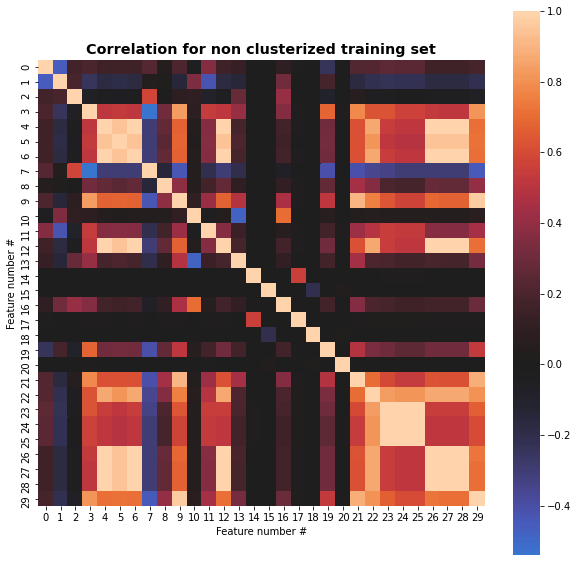

In [86]:
# Using numpy.
map_to_names, map_to_numbers = mapping(DATA_TRAIN_PATH)
tx0, y0, tx1, y1, tx2, y2, tx3, y3 = prijetnum_clustering(tx_train,y)
corr_all = np.corrcoef(tx_train.T)
corr0 = np.corrcoef(tx0.T)
corr1 = np.corrcoef(tx1.T)
corr2 = np.corrcoef(tx2.T)
corr3 = np.corrcoef(tx3.T)
colors = sns.diverging_palette(250,15, s=80, l =60,
                               as_cmap = True, center="dark")
colors = sns.color_palette("icefire",as_cmap= True )
mask = np.zeros_like(corr_all)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corr_all,center=0,cmap=colors,square=True)
plt.title("Correlation for non clusterized training set",size="x-large",weight=575)
plt.xlabel("Feature number #")
plt.xticks(rotation = "horizontal")
plt.ylabel("Feature number #")

plt.savefig("../output/corr_noclust.pdf")
plt.show()

C:\Users\richi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


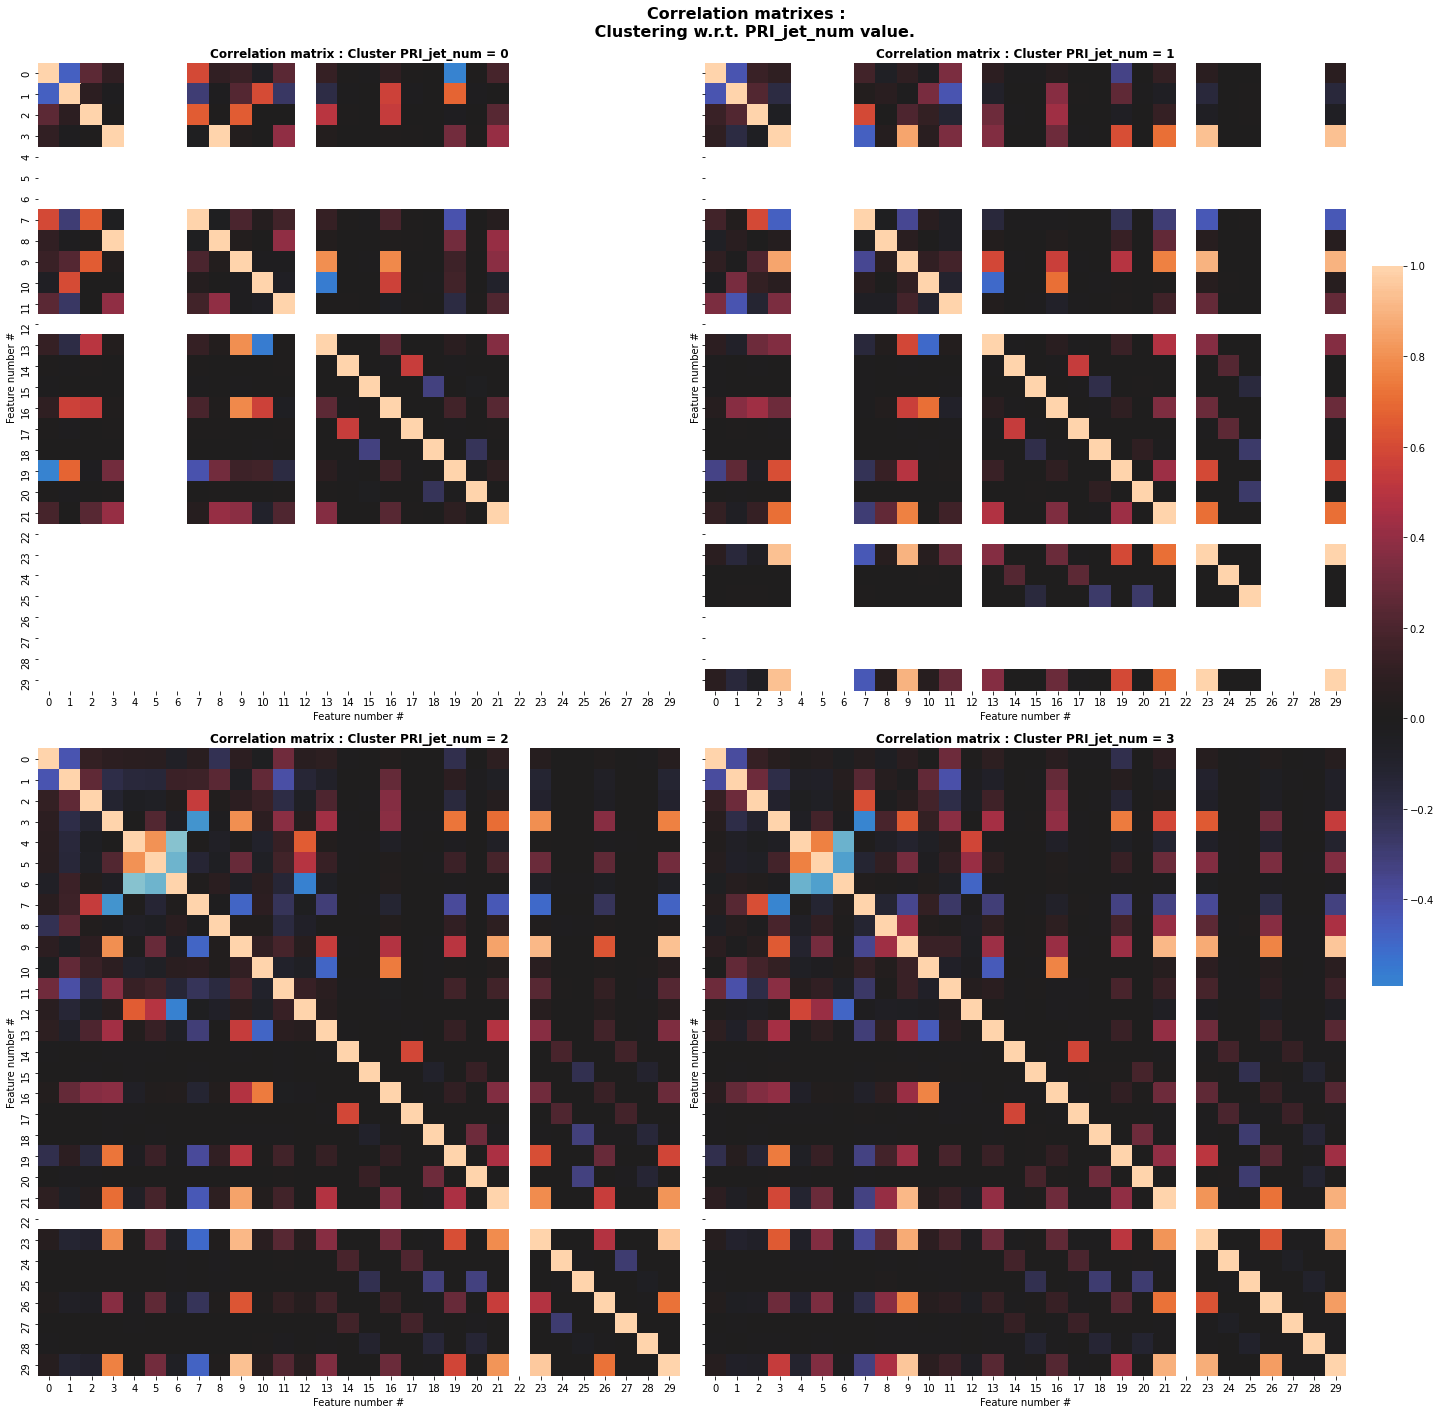

In [87]:
#Subplots
corr_array  =np.array([corr0, corr1, corr2, corr3])
fig, axn = plt.subplots(2, 2, figsize=(21,20),sharex=False, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .02, .5])
fig.subplots_adjust(top=0.87)
fig.suptitle('Correlation matrixes :  \n Clustering w.r.t. PRI_jet_num value.', 
             fontsize=16, weight = 575)
for idx, ax in enumerate(axn.flat):
    sns.heatmap(corr_array[idx], ax=ax,
                cbar=idx == 0,cmap = colors, center=0,
                cbar_ax=None if idx else cbar_ax)
    ax.set_title("Correlation matrix : Cluster PRI_jet_num = "+str(idx),weight = 575)
    ax.set_xlabel("Feature number #")
    ax.set_ylabel("Feature number #")
plt.xticks(rotation = "horizontal")
fig.tight_layout(rect=[0, 0, .9, .99])
plt.savefig("../output/corr_total.pdf")


#### **4 individual plots in hidden cells below**

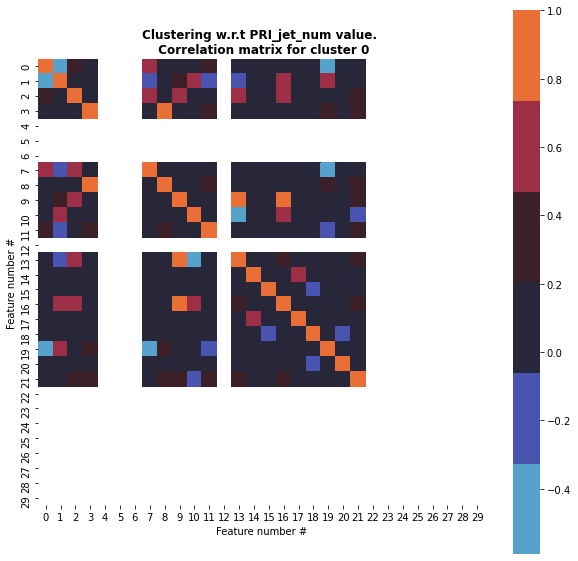

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(corr0,cmap=colors, square=True)
plt.title("Clustering w.r.t PRI_jet_num value. \n Correlation matrix for cluster 0",weight=575)
plt.xlabel("Feature number #")
plt.xticks(rotation = "horizontal")
plt.ylabel("Feature number #")

plt.savefig("../output/corr0.pdf")



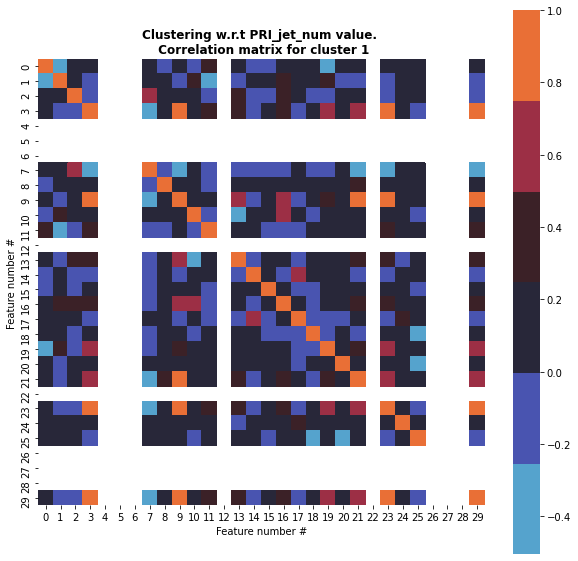

In [161]:
plt.figure(figsize=(10,10))
sns.heatmap(corr1,cmap=colors, square=True)
plt.title("Clustering w.r.t PRI_jet_num value. \n Correlation matrix for cluster 1",weight=575)
plt.xlabel("Feature number #")
plt.xticks(rotation = "horizontal")
plt.ylabel("Feature number #")

plt.savefig("../output/corr1.pdf")



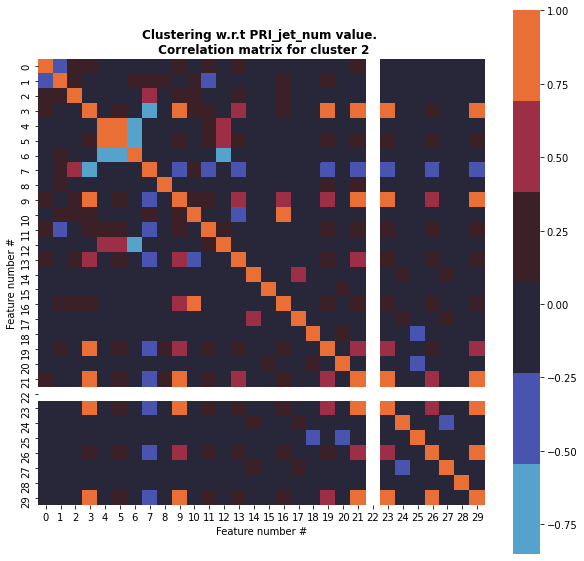

In [162]:
plt.figure(figsize=(10,10))
sns.heatmap(corr2,cmap=colors, square=True)
plt.title("Clustering w.r.t PRI_jet_num value. \n Correlation matrix for cluster 2",weight=575)
plt.xlabel("Feature number #")
plt.xticks(rotation = "horizontal")
plt.ylabel("Feature number #")
plt.savefig("../output/corr0.pdf")



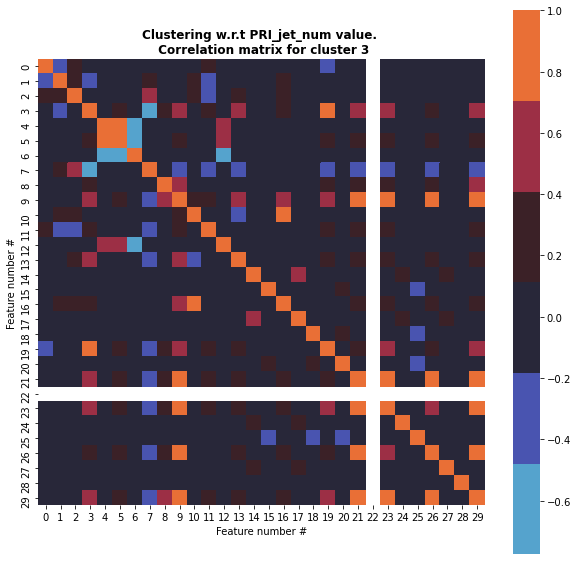

In [163]:
plt.figure(figsize=(10,10))
sns.heatmap(corr3,cmap=colors, square=True)
plt.title("Clustering w.r.t PRI_jet_num value. \n Correlation matrix for cluster 3",weight=575)
plt.xlabel("Feature number #")
plt.xticks(rotation = "horizontal")
plt.ylabel("Feature number #")

plt.savefig("../output/corr0.pdf")



### Stuff

Prediction targets detected. Using a training set. 
 Returning clusterized dataset and targets. 

Saving file under ../output/histograms.pdf


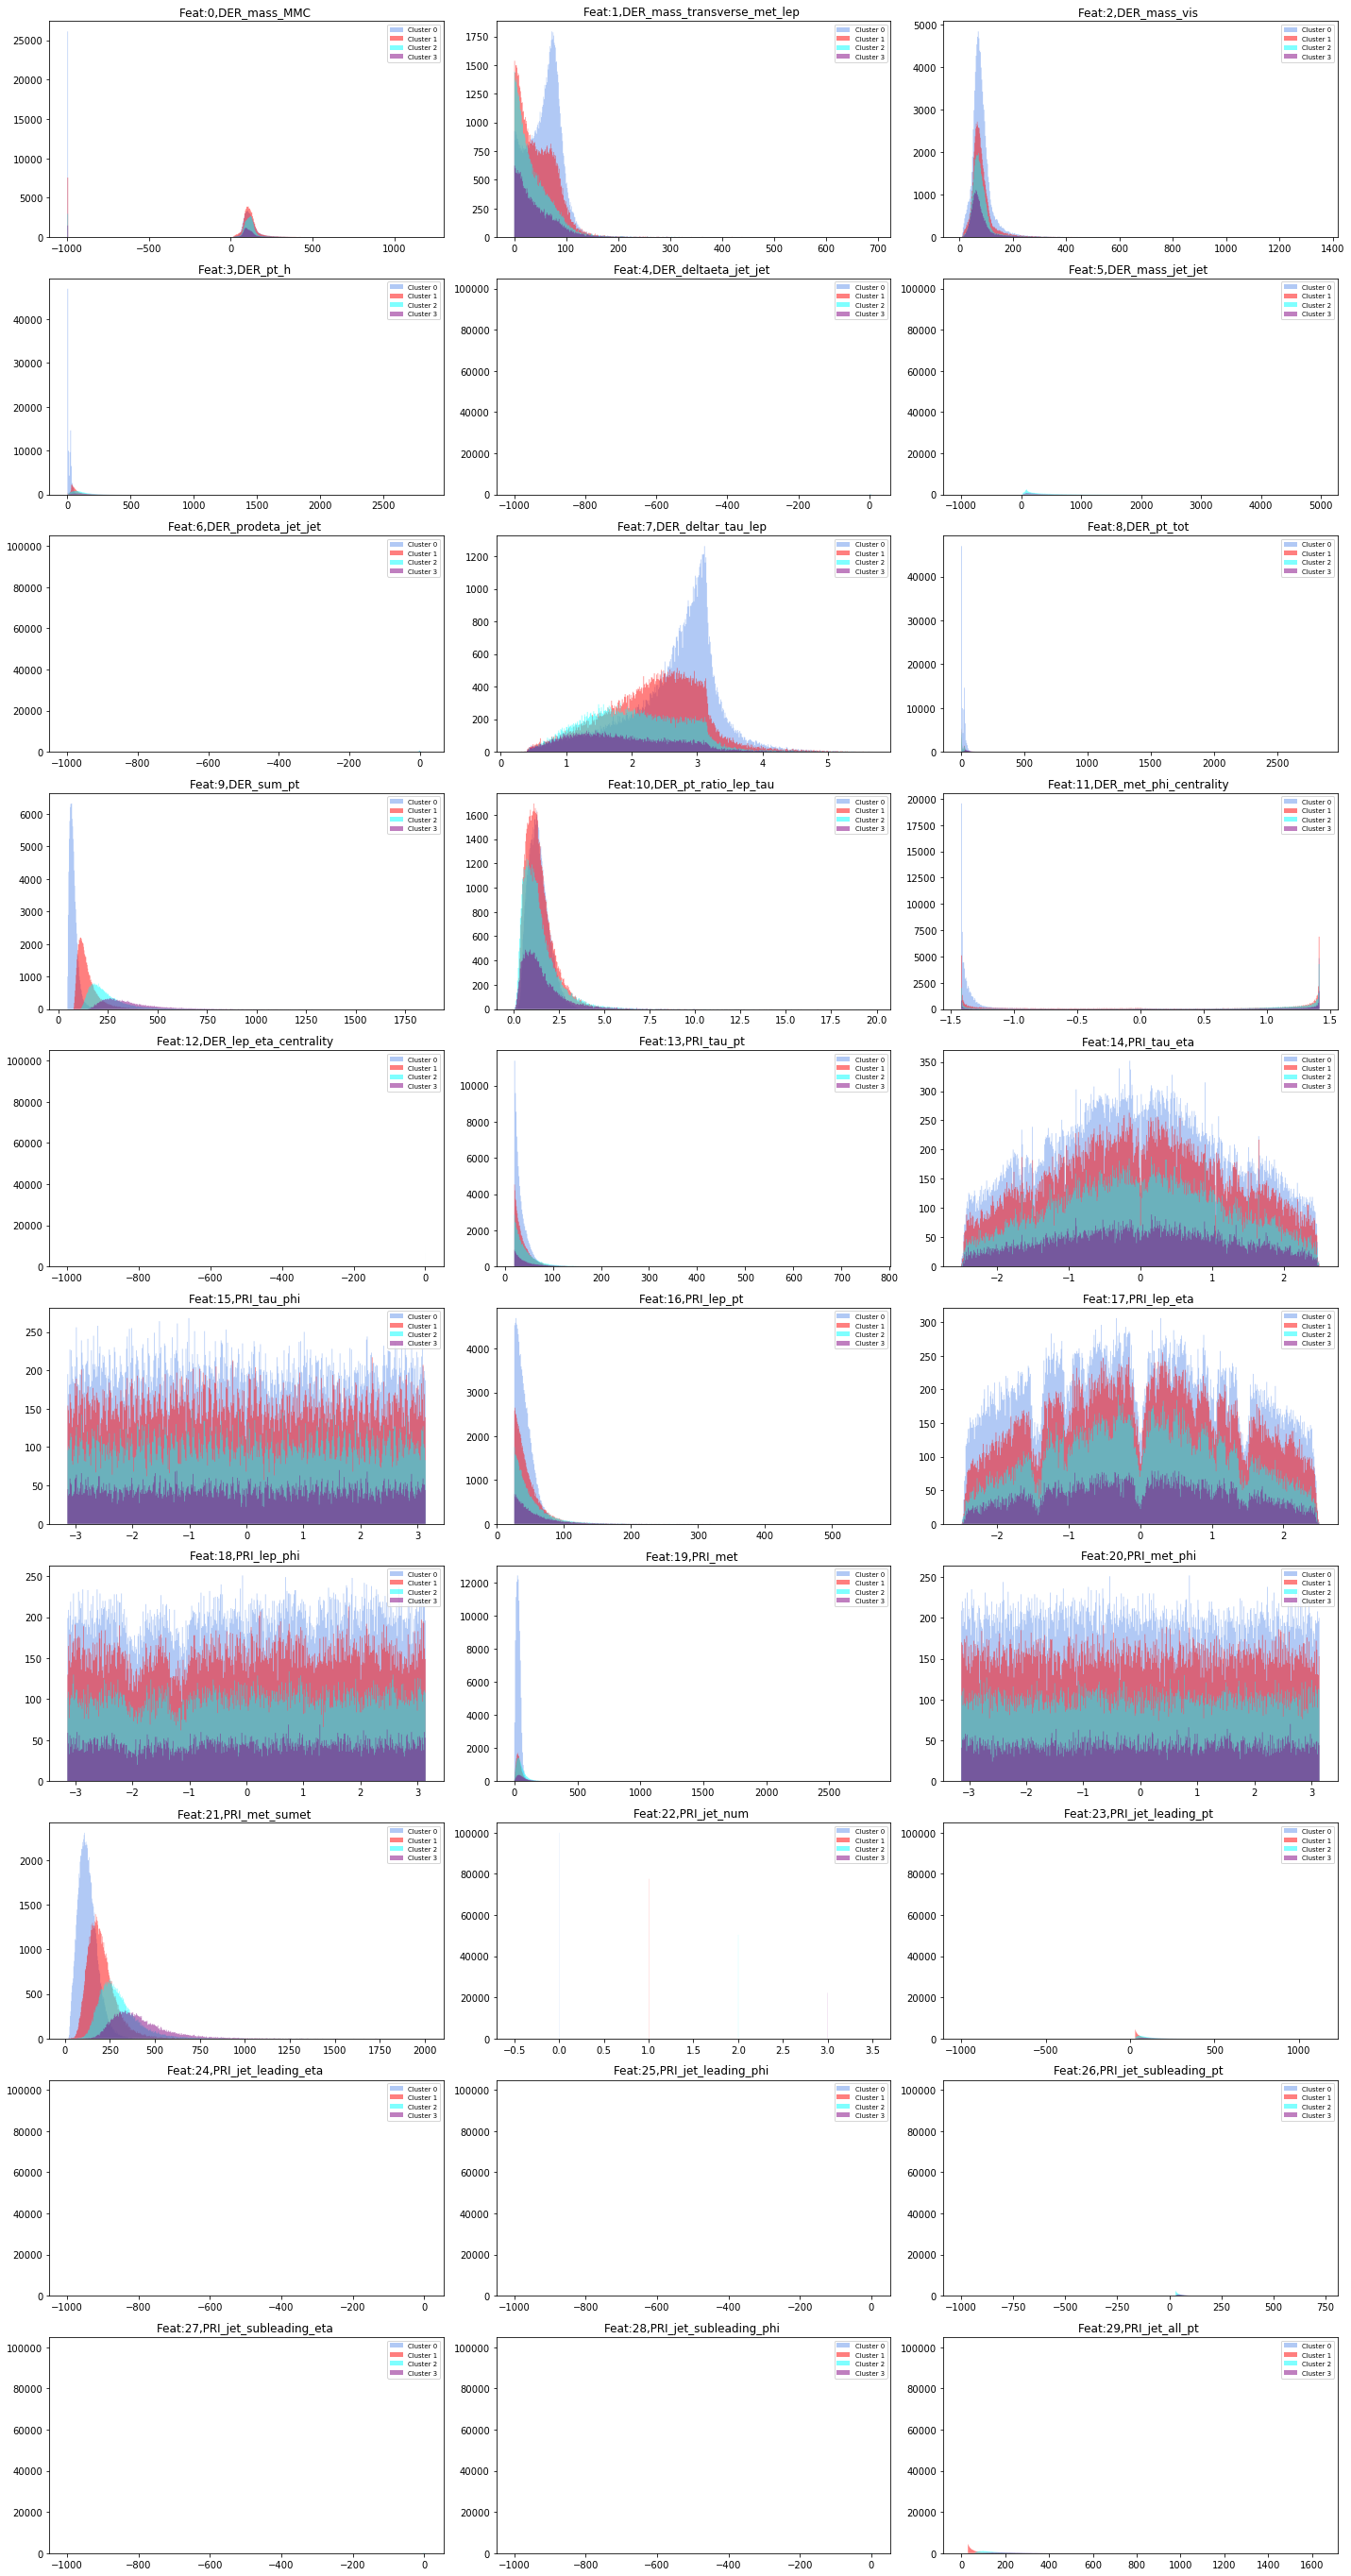

In [8]:
#Clustering
tx0, y0, tx1, y1, tx2, y2, tx3, y3 = prijetnum_clustering(tx_train,y)
histogram_clusters(tx0,tx1,tx2,tx3,save="../output/histograms.pdf")


In [122]:
from proj1_helpers import single_histogram

Prediction targets detected. Using a training set. 
 Returning clusterized dataset and targets. 



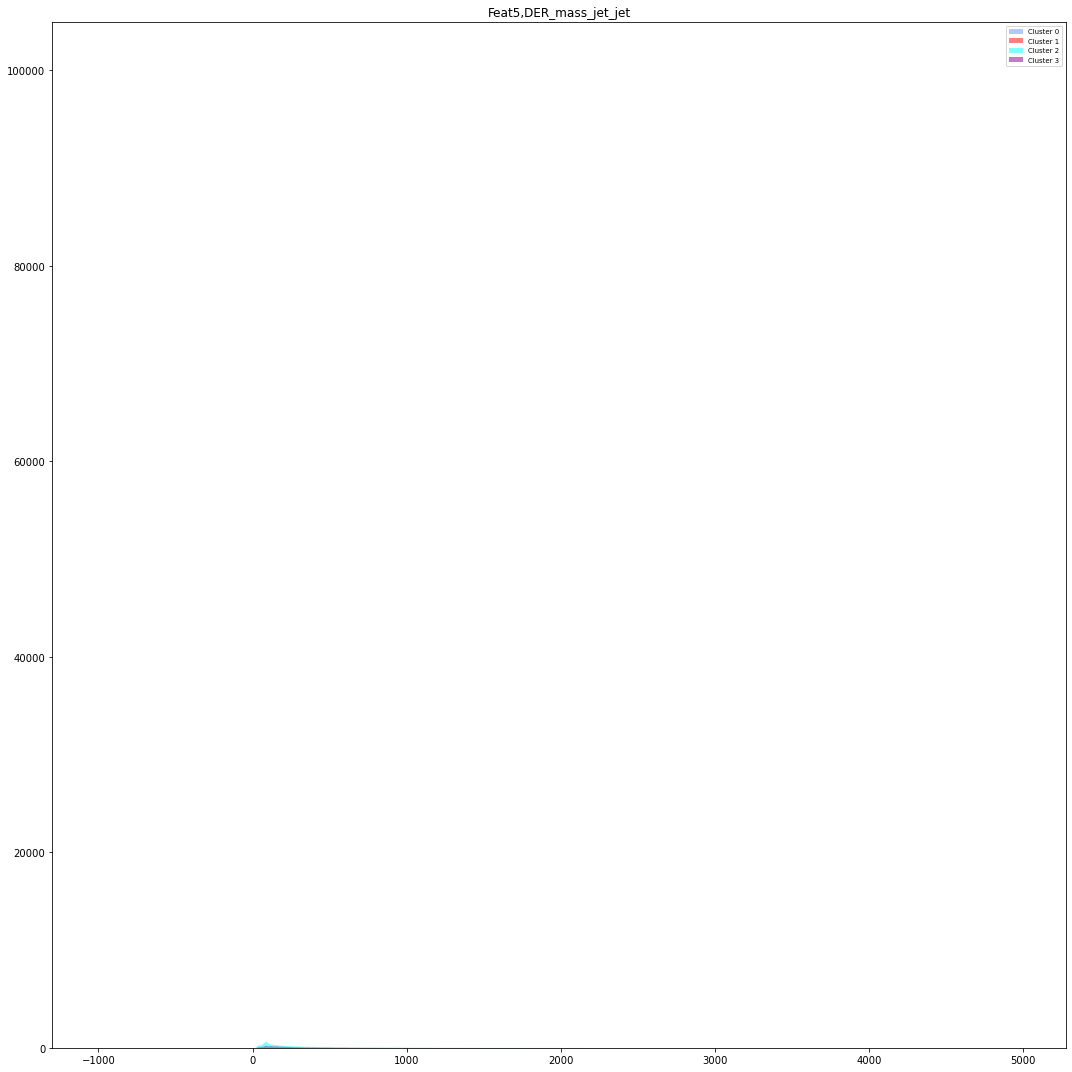

In [374]:
tx0, y0, tx1, y1, tx2, y2, tx3, y3 = prijetnum_clustering(tx_train,y)
save = False
log = False
xlim = False
ylim= False

if log:
    xlim = False
bins = 2000

single_histogram(tx0,tx1,tx2,tx3,DATA_TRAIN_PATH,
                5,bins=bins,save=save,
                 log=log,xlim=xlim,ylim=ylim)


In [377]:
#helper stuff
def takelog(tx0,tx1,tx2,tx3, feat):
    t0 = np.copy(tx0)
    t1 = np.copy(tx1)
    t2 = np.copy(tx2)
    t3 = np.copy(tx3)    
    t0[:,feat] = np.log(t0[:,feat]+0.01)
    t1[:,feat] = np.log(t1[:,feat]+0.01)
    t2[:,feat] = np.log(t2[:,feat]+0.01)
    t3[:,feat] = np.log(t3[:,feat]+0.01)
    return t0, t1, t2, t3

def takestd(t0,t1,t2,t3):
    
    t0 = standardize(t0)
    t1 = standardize(t1)
    t2 = standardize(t2)
    t3 = standardize(t3)
    return t0, t1, t2, t3

Prediction targets detected. Using a training set. 
 Returning clusterized dataset and targets. 



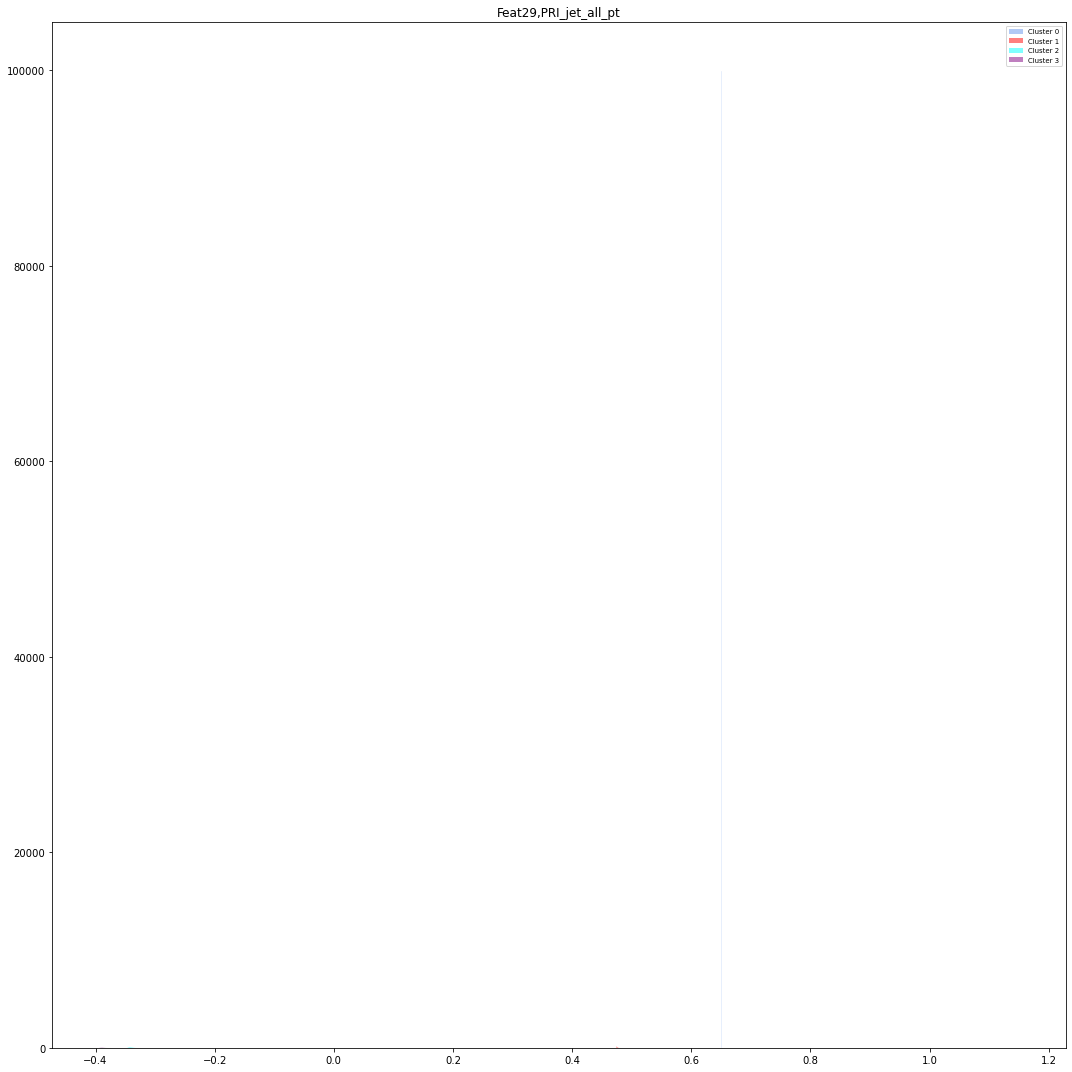

In [380]:
#Testing stuff
tx0, y0, tx1, y1, tx2, y2, tx3, y3 = prijetnum_clustering(tx_train,y)

feat = 29
tx0, tx1, tx2, tx3 = takelog(tx0,tx1,tx2,tx3,feat)

tx0, tx1, tx2, tx3 = takestd(tx0,tx1,tx2,tx3,)

single_histogram(tx0,tx1,tx2,tx3,DATA_TRAIN_PATH,
                feat,bins=bins,save=False,
                 log=False,xlim=xlim,ylim=ylim,pro=False)



#### PROCESSING + CV
Final push etc. should take inspiration from the cell below

In [457]:
#reload if needed
y, tx_train, ids = load_csv_data(DATA_TRAIN_PATH)
tx0, y0, tx1, y1, tx2, y2, tx3, y3 = prijetnum_clustering(tx_train,y)
names= get_feature_names(DATA_TRAIN_PATH)
name2num,num2name = mapping(DATA_TRAIN_PATH)

Prediction targets detected. Using a training set. 
 Returning clusterized dataset and targets. 



In [385]:
#Deleting features where whole column is -999: 
tx_del0, idx_tk0 = delete_features(tx0)
tx_del1, idx_tk1 = delete_features(tx1)
tx_del2, idx_tk2 = delete_features(tx2)
tx_del3, idx_tk3 = delete_features(tx3)
print("Removed cols from cluster 0 : \n", idx_tk0, "\n")
print("Removed cols from cluster 1 : \n", idx_tk1, "\n")


Prediction targets detected. Using a training set. 
 Returning clusterized dataset and targets. 

10 features deleted
7 features deleted
0 features deleted
0 features deleted
Removed cols from cluster 0 : 
 [4, 5, 6, 12, 23, 24, 25, 26, 27, 28] 

Removed cols from cluster 1 : 
 [4, 5, 6, 12, 26, 27, 28] 



In [454]:
xd = [1,2,3,8,9,10,13,16,19,21]
yd = tuple(xd)
num2name[xd[1]]

'DER_mass_vis'

In [460]:
print(tx0[:,xd])
tx0[:,xd] = np.log(tx0[:,xd]+0.01)
print(tx0[:,xd])
tx0.shape

[[ 81.417  80.943   0.414 ...  53.321  31.082  86.062]
 [ 16.915 134.805  16.405 ...  29.774   2.723  53.131]
 [ 50.559 100.989   4.288 ...  26.325  37.791 129.804]
 ...
 [ 58.179  68.083  22.439 ...  27.202  46.737  80.408]
 [ 19.362  68.812  13.504 ...  27.915  12.15  112.718]
 [ 72.756  70.831   7.479 ...  40.236  40.729  99.405]]
[[ 4.39970691  4.39386874 -0.85802182 ...  3.97651778  3.43695055
   4.45518416]
 [ 2.82879182  4.90390347  2.79819555 ...  3.39397134  1.00539991
   3.97294876]
 [ 3.92333874  4.61511062  1.4581498  ...  3.27089885  3.63233556
   4.86610266]
 ...
 [ 4.06369633  4.22087442  3.11124607 ...  3.30365805  3.84475008
   4.38723803]
 [ 2.96382872  4.23152346  2.60372619 ...  3.32952234  2.49815188
   4.72497784]
 [ 4.28724881  4.26043793  2.01343528 ...  3.69501062  3.70718586
   4.59930301]]


(99913, 30)

In [459]:
tx0[:,xd].shape

(99913, 10)

In [478]:
def pre_processing(tx_train,y,num2name):
    #loading data, clustering
    print("Clustering w.r.t. to PRI_jet_num numbers")
    tx0, y0, tx1, y1, tx2, y2, tx3, y3 = prijetnum_clustering(tx_train,y)
    log_features = [1,2,3,8,9,10,13,16,19,21]

    print("Taking the log of the following features : \n",[num2name.get(key) for key in log_features]
)
    tx_df0, tx_df1, tx_df2, tx_df3 = takelog(tx0,tx1,tx2,tx3,log_features)

    #Deleting features with all -999 rows
    print("Removing features with all -999 rows. Returning indices for later")
    tx_df0, idx_tk0 = delete_features(tx_df0)
    tx_df1, idx_tk1 = delete_features(tx_df1)
    tx_df2, idx_tk2 = delete_features(tx_df2)
    tx_df3, idx_tk3 = delete_features(tx_df3)
    
    ##Replacing remaining -999 values with the median of that feature
    print("Replacing remaining -999 values with median.")
    tx_df0 = replace_999_mean(tx_df0)
    tx_df1 = replace_999_mean(tx_df1)
    tx_df2 = replace_999_mean(tx_df2)
    tx_df3 = replace_999_mean(tx_df3)
    
    #Standardizing
    print("Standardizing : Setting mean to 0 and variance to 1")
    tx_df0 = standardize(tx_df0)
    tx_df1 = standardize(tx_df1)
    tx_df2 = standardize(tx_df2)
    tx_df3 = standardize(tx_df3)
    print("Preprocessing done")
    if y is None:
        print("No target detected. Returning clustered dataset&indice(t0,i1,...) and deleted indices")
    return tx_df0, y0, tx_df1, y1, tx_df2, y2, tx_df3, y3, idx_tk0, idx_tk1, idx_tk2, idx_tk3

In [479]:
tx0, y0, tx1, y1, tx2, y2, tx3, y3, id0, id1, id2, id3 = pre_processing(tx_train,y,num2name)

Clustering w.r.t. to PRI_jet_num numbers
Prediction targets detected. Using a training set. 
 Returning clusterized dataset and targets. 

Taking the log of the following features : 
 ['DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'PRI_tau_pt', 'PRI_lep_pt', 'PRI_met', 'PRI_met_sumet']
Removing features with all -999 rows. Returning indices for later
10 features deleted
7 features deleted
0 features deleted
0 features deleted
Replacing remaining -999 values with median.
Standardizing : Setting mean to 0 and variance to 1
Preprocessing done


In [463]:
k_fold=6
lambdas = np.logspace(-9,-1,12)
degrees = np.array(range(1,12))

RIDGE CROSSVAL+graphs

Iterating. Testing 12 lambdas for current degree = 1
Iterating. Testing 12 lambdas for current degree = 2
Iterating. Testing 12 lambdas for current degree = 3
Iterating. Testing 12 lambdas for current degree = 4
Iterating. Testing 12 lambdas for current degree = 5
Iterating. Testing 12 lambdas for current degree = 6
Iterating. Testing 12 lambdas for current degree = 7
Iterating. Testing 12 lambdas for current degree = 8
Getting best degree and lambda
Ridge regression : getting optimal weights with best degree (8), lambda (1e-09)
Done, returning optimal weight, degree, lambda 
 And train and test loss arrays for visualization


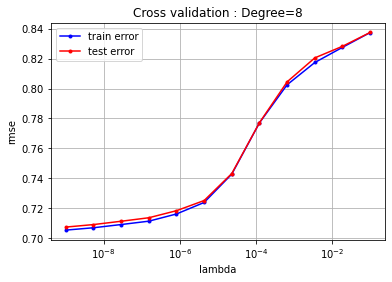

In [464]:
wopt0, deg0, _, train, test = crossval_ridge_gridsearch(y0,tx0,k_fold,lambdas,degrees,loss=True)
cv_viz(deg0,lambdas,train[deg0-1,:],test[deg0-1,:])

Iterating. Testing 12 lambdas for current degree = 1
Iterating. Testing 12 lambdas for current degree = 2
Iterating. Testing 12 lambdas for current degree = 3
Iterating. Testing 12 lambdas for current degree = 4
Iterating. Testing 12 lambdas for current degree = 5
Iterating. Testing 12 lambdas for current degree = 6
Iterating. Testing 12 lambdas for current degree = 7
Iterating. Testing 12 lambdas for current degree = 8
Getting best degree and lambda
Ridge regression : getting optimal weights with best degree (6), lambda (1e-09)
Done, returning optimal weight, degree, lambda 
 And train and test loss arrays for visualization


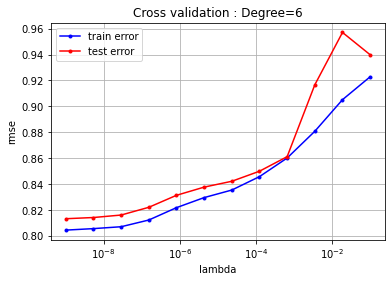

In [465]:
_, deg1, _, train, test = crossval_ridge_gridsearch(y1,tx1,k_fold,lambdas,degrees,loss=True)
cv_viz(deg1,lambdas,train[deg1-1,:],test[deg1-1,:])

Iterating. Testing 12 lambdas for current degree = 1
Iterating. Testing 12 lambdas for current degree = 2
Iterating. Testing 12 lambdas for current degree = 3
Iterating. Testing 12 lambdas for current degree = 4
Iterating. Testing 12 lambdas for current degree = 5
Iterating. Testing 12 lambdas for current degree = 6
Iterating. Testing 12 lambdas for current degree = 7
Iterating. Testing 12 lambdas for current degree = 8
Getting best degree and lambda
Ridge regression : getting optimal weights with best degree (5), lambda (2.310129700083158e-05)
Done, returning optimal weight, degree, lambda 
 And train and test loss arrays for visualization


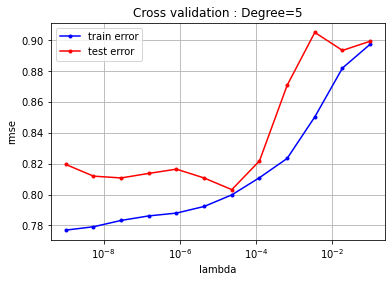

In [466]:
_, deg2, _, train2, test2 = crossval_ridge_gridsearch(y2,tx2,k_fold,lambdas,degrees,loss=True)
cv_viz(deg2,lambdas,train2[deg2-1,:],test2[deg2-1,:])

Iterating. Testing 12 lambdas for current degree = 1
Iterating. Testing 12 lambdas for current degree = 2
Iterating. Testing 12 lambdas for current degree = 3
Iterating. Testing 12 lambdas for current degree = 4
Iterating. Testing 12 lambdas for current degree = 5
Iterating. Testing 12 lambdas for current degree = 6
Iterating. Testing 12 lambdas for current degree = 7
Iterating. Testing 12 lambdas for current degree = 8
Getting best degree and lambda
Ridge regression : getting optimal weights with best degree (5), lambda (1e-09)
Done, returning optimal weight, degree, lambda 
 And train and test loss arrays for visualization


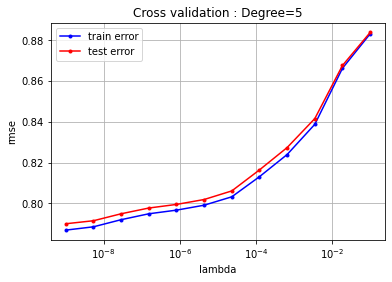

In [467]:
_, deg3, _, train3, test3 = crossval_ridge_gridsearch(y3,tx3,k_fold,lambdas,degrees,loss=True)
cv_viz(deg3,lambdas,train3[deg3-1,:],test3[deg3-1,:])

In [473]:
#Getting test-data
DATA_TEST_PATH = '../data/test.csv' # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '../submissions/' # TODO: fill in desired name of output file for submission   

In [481]:
def pre_processing_test(tX_test, id_del0, id_del1,
                        id_del2, id_del3, degs, num2name):
    
    test0, i0, test1, i1, test2, i2, test3, i3, = prijetnum_clustering(tX_test)
    log_features = [1,2,3,8,9,10,13,16,19,21]

    print("Taking the log of the following features : \n",[num2name.get(key) for key in log_features]
)
    test0,test1,test2,test3 = takelog(test0,test1,test2,test3,log_features)

    #Deleting features with all -999 rows

    print("deleting corresponding columns")
    test0 = np.delete(test0,id_del0,1)
    test1 = np.delete(test1,id_del1,1) 
    test2 = np.delete(test2,id_del2,1) 
    test3 = np.delete(test3,id_del3,1) 
    print("Replacing remaining -999 values with median")
    ##Replacing remaining -999 values with the median of that feature
    test0 = replace_999_mean(test0)
    test1 = replace_999_mean(test1)
    test2 = replace_999_mean(test2)
    test3 = replace_999_mean(test3)
    #Standardizing
    print("Standardizing : Setting mean to 0 and variance to 1")
    test0 = standardize(test0)
    test1 = standardize(test1)
    test2 = standardize(test2)
    test3 = standardize(test3)
    print("Augmenting features")
    test0 = build_poly(test0,degs[0])
    test1 = build_poly(test1,degs[1])
    test2 = build_poly(test2,degs[2])
    test3 = build_poly(test3,degs[3])
    print("Preprocessing done, returning clusterized test set and indices")
    return test0, i0, test1, i1, test2, i2, test3, i3


In [482]:
test0, i0, test1, i1, test2, i2, test3, i3 = pre_processing_test(tX_test, id0, id1,
                                                                 id2, id3, degs, num2name)

No targets detected. Using a test-set. 
 Returning clusterized dataset and indices. 

Taking the log of the following features : 
 ['DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'PRI_tau_pt', 'PRI_lep_pt', 'PRI_met', 'PRI_met_sumet']
deleting corresponding columns
Replacing remaining -999 values with median
Standardizing : Setting mean to 0 and variance to 1
Augmenting features
Preprocessing done, returning clusterized test set and indices


## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '../submissions/' # TODO: fill in desired name of output file for submission


In [484]:
#ridge cluster prediction
ypredridge_0 = predict_labels(wopt0,test0)
ypredridge_1 = predict_labels(wopt1,test1)
ypredridge_2 = predict_labels(wopt2,test2)
ypredridge_3 = predict_labels(wopt3,test3)
ypred_ridge = np.ones(ids_test.shape[0])
ypred_ridge[i0]=ypredridge_0
ypred_ridge[i1]=ypredridge_1
ypred_ridge[i2]=ypredridge_2
ypred_ridge[i3]=ypredridge_3
create_csv_submission(ids_test, ypred_ridge, OUTPUT_PATH+"whatever_mean.csv")


### TWO CELLS TO RETRY EVERYTHING AT ONCE 

In [488]:
from preprocessing import cluster_preprocessing_train, cluster_preprocessing_test
from proj1_helpers import cluster_predict
#TRAINING PART
#loading data
y, tx_train, ids = load_csv_data(DATA_TRAIN_PATH)
names= get_feature_names(DATA_TRAIN_PATH)
name2num,num2name = mapping(DATA_TRAIN_PATH)
#Train preprocessing
tx0, y0, tx1, y1, tx2, y2, tx3, y3, id0, id1, id2, id3 = cluster_preprocessing_train(tx_train,y,num2name)
#K-fold CV
k_fold=6
lambdas = np.logspace(-9,-1,12)
degrees = np.array(range(1,12))
#RIDGE CV USING THE NEW PRE PROC'd data
w0, d0, _ = crossval_ridge_gridsearch(y0,tx0,k_fold,lambdas,degrees,loss=False)
w1, d1, _ = crossval_ridge_gridsearch(y1,tx1,k_fold,lambdas,degrees,loss=False)
w2, d2, _ = crossval_ridge_gridsearch(y2,tx2,k_fold,lambdas,degrees,loss=False)
w3, d3, _ = crossval_ridge_gridsearch(y3,tx3,k_fold,lambdas,degrees,loss=False)
degs=[d0,d1,d2,d3]

[autoreload of proj1_helpers failed: Traceback (most recent call last):
  File "C:\Users\richi\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
NameError: name 'wopt0' is not defined
]


PREPROCESSING TRAIN DATA 
 Clustering w.r.t. to PRI_jet_num numbers
Prediction targets detected. Using a training set. 
 Returning clusterized dataset and targets. 

Taking the log of the following features : 
 ['DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'PRI_tau_pt', 'PRI_lep_pt', 'PRI_met', 'PRI_met_sumet']
Removing features with all -999 rows. Returning indices for later
10 features deleted
7 features deleted
0 features deleted
0 features deleted
Replacing -999 values with mean
Standardizing : Setting mean to 0 and variance to 1
Preprocessing done
Iterating. Testing 12 lambdas for current degree = 1
Iterating. Testing 12 lambdas for current degree = 2
Iterating. Testing 12 lambdas for current degree = 3
Iterating. Testing 12 lambdas for current degree = 4
Iterating. Testing 12 lambdas for current degree = 5
Iterating. Testing 12 lambdas for current degree = 6
Iterating. Testing 12 lambdas for current degree = 7
Iter

PREPROCESSING TRAIN DATA 
 Clustering w.r.t. to PRI_jet_num numbers
Prediction targets detected. Using a training set. 
 Returning clusterized dataset and targets. 

Taking the log of the following features : 
 ['DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'PRI_tau_pt', 'PRI_lep_pt', 'PRI_met', 'PRI_met_sumet']
Removing features with all -999 rows. Returning indices for later
10 features deleted
7 features deleted
0 features deleted
0 features deleted
Replacing -999 values with mean
Standardizing : Setting mean to 0 and variance to 1
Preprocessing done
Iterating. Testing 12 lambdas for current degree = 1
Iterating. Testing 12 lambdas for current degree = 2
Iterating. Testing 12 lambdas for current degree = 3
Iterating. Testing 12 lambdas for current degree = 4
Iterating. Testing 12 lambdas for current degree = 5
Iterating. Testing 12 lambdas for current degree = 6
Iterating. Testing 12 lambdas for current degree = 7
Iter

NameError: name 'cluster_standardize' is not defined

In [487]:
#TESTING PART
#Getting test-data
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '../submissions/' 
#Test preprocessing
test0, i0, test1, i1, test2, i2, test3, i3 = cluster_preprocessing_test(tX_test, id0, id1,
                                                                 id2, id3, degs, num2name)
#Prediction

yclusterpred = cluster_predict(w0,w1,w2,w3,
                               test0,test1,test2,test3,
                               i0,i1,i2,i3,how="normal")

yclusterpred==ypred_ridge